In [1]:
from tensorflow.keras.models import Sequential, load_model
import os
import numpy as np
import nibabel as nib
import tensorflow as tf
import matplotlib.pyplot as plt
from skimage import measure
from skimage.transform import resize
from keras_unet.metrics import dice_coef
from keras_unet.models import custom_unet
from keras_unet.losses import jaccard_distance
from sklearn.model_selection import train_test_split
from PIL import Image
from PIL import ImageOps
import fnmatch
import nibabel as nib
import shutil
%matplotlib inline

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [2]:
def gather_set(data_path, phrase):
    set_of = []
    path = data_path + '\\'
    for f in os.listdir(data_path):
      if phrase in f:
        set_of.append(f)
      else:
        continue
    set_of = np.array(set_of)

    indices = np.array(range(len(set_of))) # we will use this in the next step.

    return set_of

In [3]:
def gather_set_and_path(data_path, phrase):
    set_of = []
    path = data_path + '\\'
    for f in os.listdir(data_path):
      if phrase in f:
        set_of.append(str(data_path+f))
      else:
        continue
    #set_of = np.array(set_of)

    indices = np.array(range(len(set_of))) # we will use this in the next step.

    return set_of

In [4]:
path = r"C:\Users\UAB\data\Emory\Tensors"
images = gather_set_and_path(path, 'Prediction')

In [5]:
id_list = []   
for i in range(len(images)):
    image_name = os.path.basename(images[i])
    unique_id =  image_name[0:17]
    id_list.append(unique_id)

unique_ids = list(set(id_list))

In [6]:
print(unique_ids)

['EM_200922_0_144_R', 'EM_200922_0_144_L']


In [7]:
prediction_gather = []
for i in range(len(unique_ids)):
    patient = unique_id[i]
    for x in range(len(images)):
        if any(phrase in images[x] for phrase in patient):
            prediction_gather.append(images[x])

In [11]:
patient_num = 0
model_1 = np.load(prediction_gather[(patient_num)*5])
model_2 = np.load(prediction_gather[(patient_num)*5+1])
model_3 = np.load(prediction_gather[(patient_num)*5+2])
model_4 = np.load(prediction_gather[(patient_num)*5+3])
inst = np.load(prediction_gather[(patient_num)*5+4])
name = str(unique_id[patient_num]+'AllModel.png')
img_path = r"F:\Kidney Unet\tensors\Emory\\"
slice_num = 60

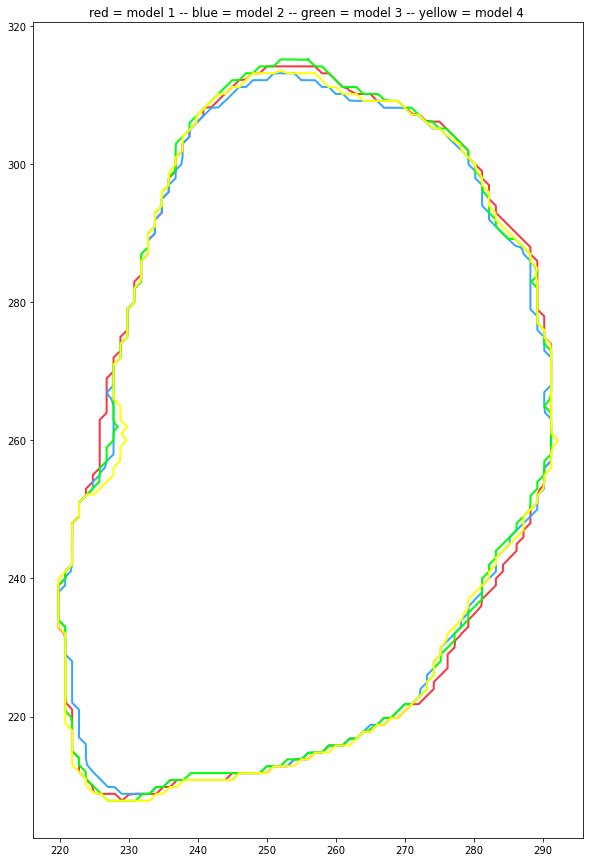

In [13]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot()
#ax.imshow( cmap=plt.cm.gray)

contours = measure.find_contours(model_1[:,:,slice_num], 0.8)
for j,contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0],color='#FB3640', lw=2)
    contours = measure.find_contours(model_2[:,:,slice_num], 0.8)
    for contour in contours:
        ax.plot(contour[:, 1], contour[:, 0],color='#35A7FF', lw=2)
        contours = measure.find_contours(model_3[:,:,slice_num], 0.8)
    for contour in contours:
        ax.plot(contour[:, 1], contour[:, 0],color='#00FF00', lw=2)
        contours = measure.find_contours(model_4[:,:,slice_num], 0.8)  
    for contour in contours:
        ax.plot(contour[:, 1], contour[:, 0],color='#FFFF00', lw=2)
        contours = measure.find_contours(original[:,:,slice_num], 0.8)

ax.axis('image')
ax.title.set_text('red = model 1 -- blue = model 2 -- green = model 3 -- yellow = model 4 ')
fig.savefig(os.path.join(img_path,name))